In [13]:
import pandas as pd
import numpy as np
import sklearn

In [14]:
dataset3=pd.read_csv('phase3.csv')

In [15]:
dataset3.drop('num_outbound_cmds',axis=1,inplace=True)

In [16]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
dataset3['protocol_type'] = label_encoder.fit_transform(dataset3['protocol_type'])
dataset3['service'] = label_encoder.fit_transform(dataset3['service'])
dataset3['flag'] = label_encoder.fit_transform(dataset3['flag'])

# Application d'un Algo d'A.N.S:

In [17]:
X = dataset3.values
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pc = pca.fit_transform(X)

In [19]:
PCA_dataset3 = pd.DataFrame(data = pc, columns = ['ens1', 'ens2'] )

In [20]:
pc1 = PCA_dataset3['ens1']
pc2 = PCA_dataset3['ens2']

<Figure size 432x288 with 0 Axes>

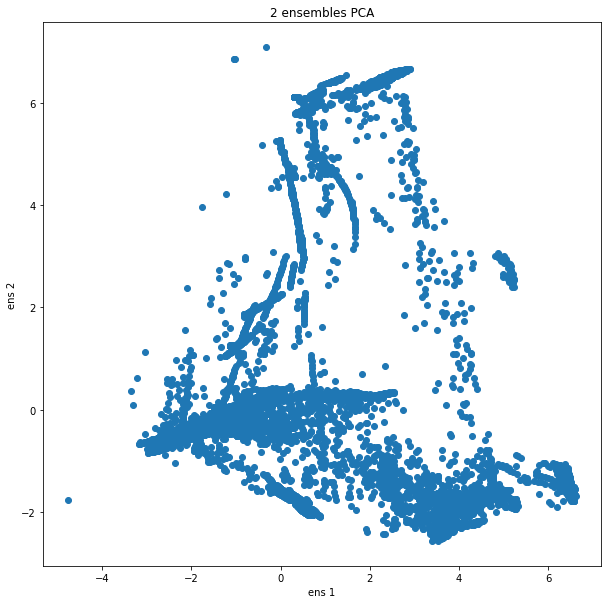

In [22]:
from matplotlib import pyplot as plt 
plt.figure()
plt.figure(figsize=(10,10))
plt.xlabel('ens 1')
plt.ylabel('ens 2')
plt.title('2 ensembles PCA')
plt.scatter(PCA_dataset3['ens1'], PCA_dataset3['ens2'])

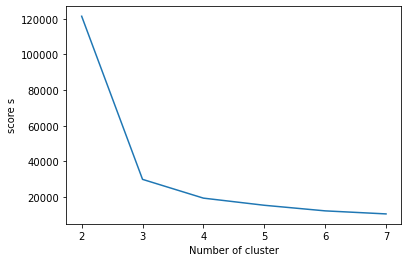

In [23]:
from sklearn.cluster import KMeans
enss={}
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(PCA_dataset3)
    enss[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(enss.keys()), list(enss.values()))
plt.xlabel("Number of cluster")
plt.ylabel("score s")
plt.show()

D'apres le graphe, on remarque que le elbow et entre 3 et 4.

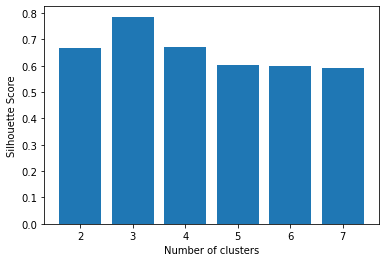

In [24]:
from sklearn.metrics import silhouette_score
sils=[]
for n in range(2, 8):
    sils.append(silhouette_score(PCA_dataset3, KMeans(n_clusters = n).fit_predict(PCA_dataset3))) 
    
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, sils) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

    On cherche le score le plus grand, on obtient un cluster=3.

In [25]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(PCA_dataset3)

KMeans(n_clusters=3)

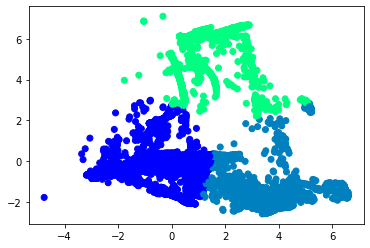

In [27]:
plt.scatter(PCA_dataset3['ens1'], PCA_dataset3['ens2'],c = KMeans(n_clusters = 3).fit_predict(PCA_dataset3), cmap =plt.cm.winter) 
plt.show() 

# Mesure de performances de cet Algorithme :

In [42]:
from sklearn.metrics import silhouette_score
koki=[2,3]
for n in koki:
    kmeanss = KMeans(n_clusters=n)
    kmeanss.fit(PCA_dataset3)
    clabel=kmeanss.labels_
    sil_avg = silhouette_score(PCA_dataset3, clabel)
    print("la moyenne de silhouette   =", sil_avg)
     

la moyenne de silhouette   = 0.6677489107071535
la moyenne de silhouette   = 0.7861650411284896


la moyenne de silhouette dans notre cas  = 0.78 qui nous donne une structure profonde.

-

Reponse n°3 :
 -OUI !! il est possible de combiner les deux phases.
 par une concatenation de phase3.csv et phase2.csv

In [43]:
#sorry i didnt finish the work.. i hadn't enough time 